### Barabassi-Albert model

The major idea is preferential attachment. In a network, new members are going to attach themselves to nodes that have high degree. In a social network this equates to people who are popular.

"The rich get richer".

#### Algorithm (loose version)

A new node has to attach itself to the network.

$ \Pi(k_i) $ is the probability of the new node will link to with node at $ i $, having degree $ k_i $.

Let $ m $ be the number of new edges added when a new edge joins a network.

$ \Pi(k_i) = \frac{k_i}{\sum_{j = 1}^m k_j} $

The probabilities of all $ k_i $, for each moment in the algorithm, will add up to $ 1 $.

$ \sum_{i=1}^n \Pi(k_i) = \large \frac{\sum_{i=1}^n k_i}{\sum_{j = 1}^m k_j} = \small 1$

There is a notion of time: a moment is when a new node is added. 

The algorithm is this:

- New node is to add $ m $ new edges to a newtork $ G $
- Starting with a random set of indexes $ \{i\} $ for all nodes in the network
- Form one new edge to the node $ G_i $ with probability $ \large \frac{k_i}{sum_{j=1}^n k_j} $
- Once $ m $ edges are added, then increment time (add another node)

This algorithm keeps iterating over all possible nodes in the network until the new node has degree $ k = m $

In [8]:
library("igraph")

m = 2;

edgeList = matrix(c(1,2), ncol=2, nrow=1)
g <- graph(edgeList, directed = FALSE);

edgesAdded <- m;

In [9]:
addNodes <- function(g,m){

    nodeCount = vcount(g);
    nodeIndexesRandom = sample(1:nodeCount);
    
    if(edgesAdded >= m) {
        edgesAdded <<- 0;
        g <- add_vertices(g, 1);
        nodeCount = nodeCount+1;
    }
    indexToAdd = nodeCount;

    edgeDegrees = degree(g);

    if(edgesAdded > 0) {
        nodeIndexesRandom = nodeIndexesRandom[nodeIndexesRandom != indexToAdd];
        edgeDegrees = edgeDegrees[-indexToAdd];
    }
    
    nodeIndexesWithoutEdge = c()
    for(index in nodeIndexesRandom) {
        if(!are.connected(g, indexToAdd, index)) {
            nodeIndexesWithoutEdge = c(nodeIndexesWithoutEdge, index);
        }
    }
        
    for(index in nodeIndexesWithoutEdge) {
        #print(sprintf("Considering edge %d->%d", indexToAdd, index))
        edgeProbability = edgeDegrees[index]/sum(edgeDegrees);
        #print(sprintf("Probability to add %f", edgeProbability))
        toAddTrial <- runif(n=1, min=0, max=1);
        if (toAddTrial <= edgeProbability) {
            #print("Adding")
            g <- add_edges(g, c(indexToAdd, index));
            edgesAdded <<- edgesAdded + 1;
        } else {
            #print("Not adding")
        }
        
        if (edgesAdded >= m || nodeCount < m) {
            break;
        }
    }
    
    (g)
}

$res
[1] 1.00 1.00 0.75 0.75  NaN

$centralization
[1] NaN

$theoretical_max
[1] 1.714286



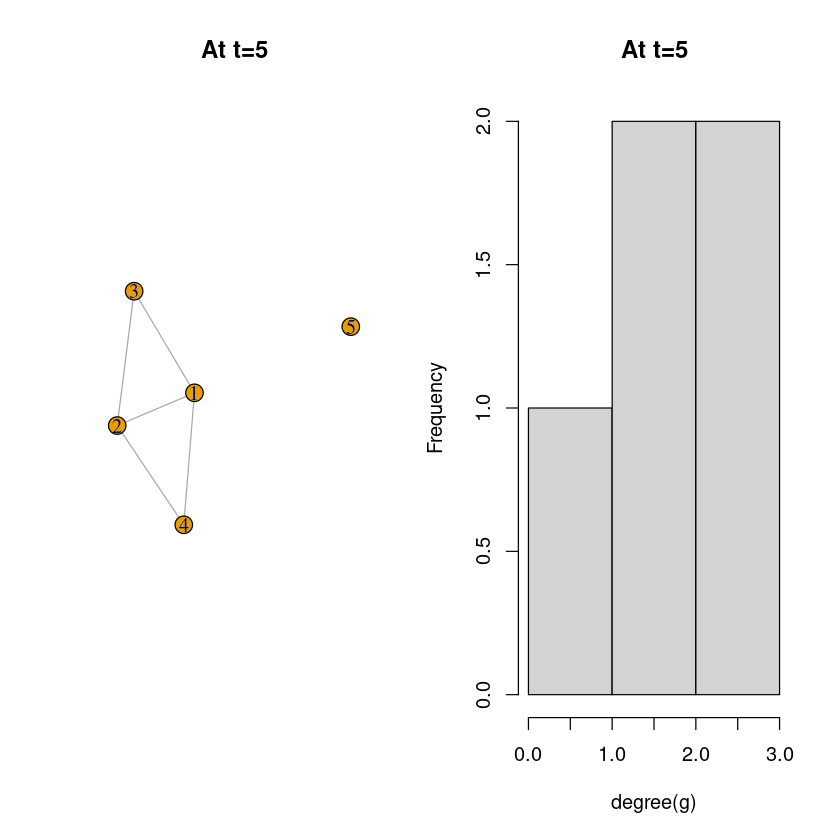

$res
[1] 0.5833333 0.8750000 0.5833333 0.5833333 0.6363636 0.5384615 0.6363636
[8] 0.4117647

$centralization
[1] 0.6661096

$theoretical_max
[1] 3.230769



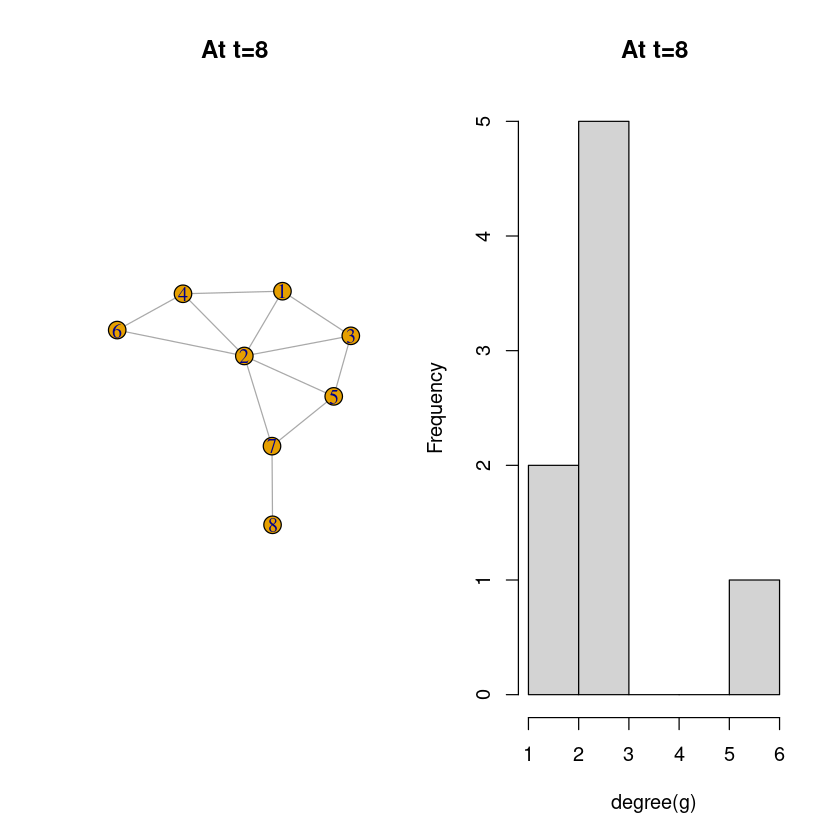

$res
 [1] 0.5625000 0.7500000 0.5625000 0.6923077 0.6923077 0.6000000 0.6000000
 [8] 0.5000000 0.5625000 0.5000000       NaN

$centralization
[1] NaN

$theoretical_max
[1] 4.736842



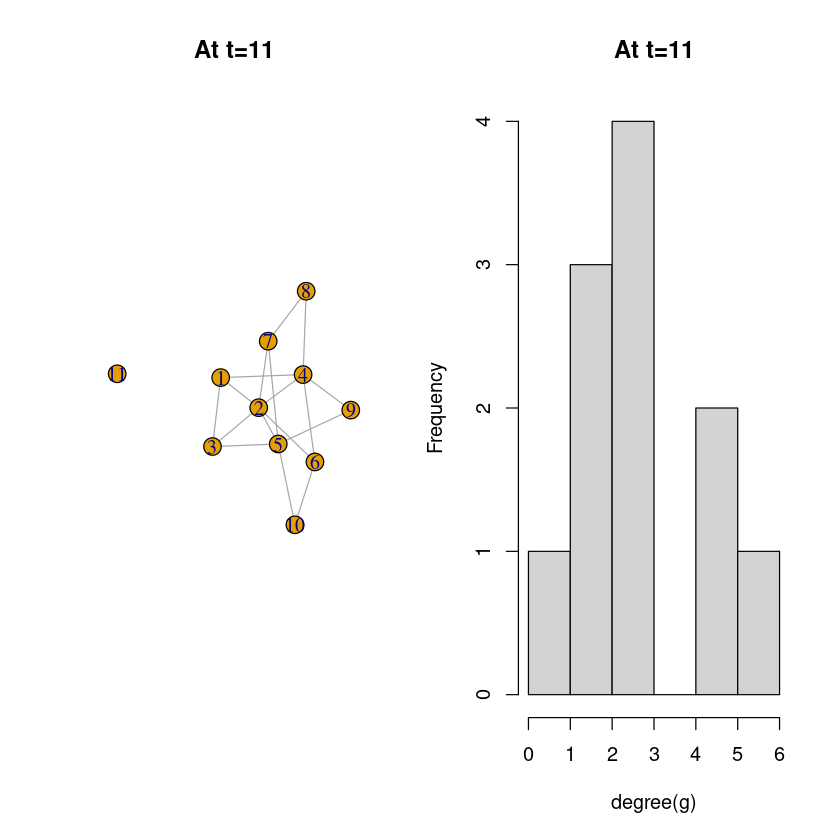

$res
 [1] 0.6190476 0.6500000 0.5200000 0.6500000 0.5909091 0.5000000 0.5909091
 [8] 0.4814815 0.5000000 0.4193548 0.4814815 0.4814815 0.4333333 0.4333333

$centralization
[1] 0.2802353

$theoretical_max
[1] 6.24



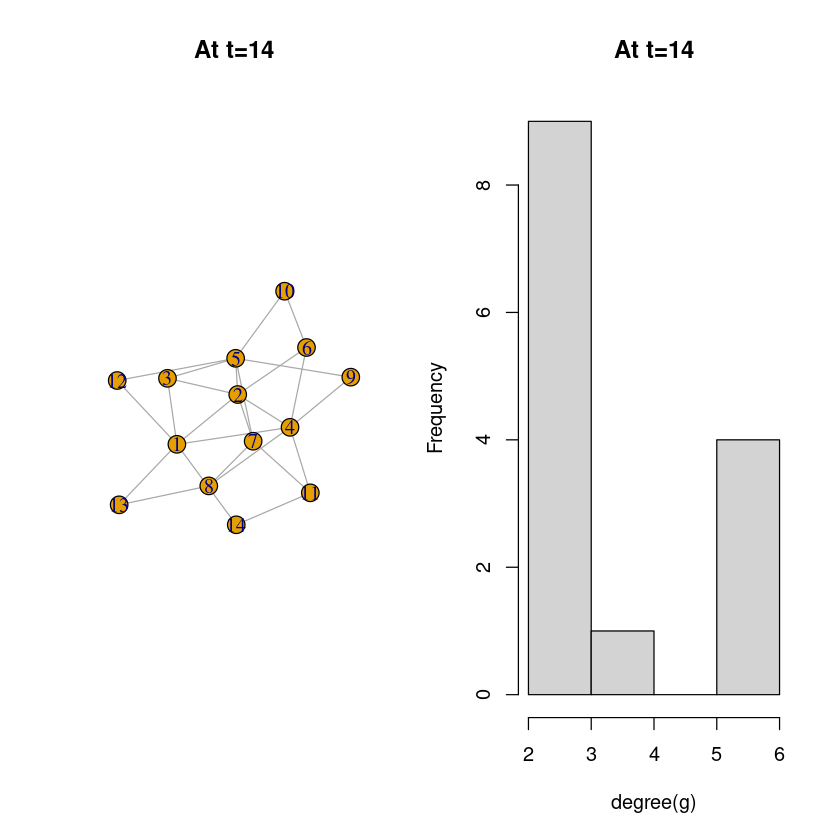

$res
 [1] 0.5862069 0.6296296 0.5666667 0.5666667 0.6296296 0.4857143 0.5483871
 [8] 0.4358974 0.4722222 0.4358974 0.4473684 0.4594595 0.4047619 0.4473684
[15] 0.4250000 0.4473684 0.4250000 0.4473684       NaN

$centralization
[1] NaN

$theoretical_max
[1] 8.742857



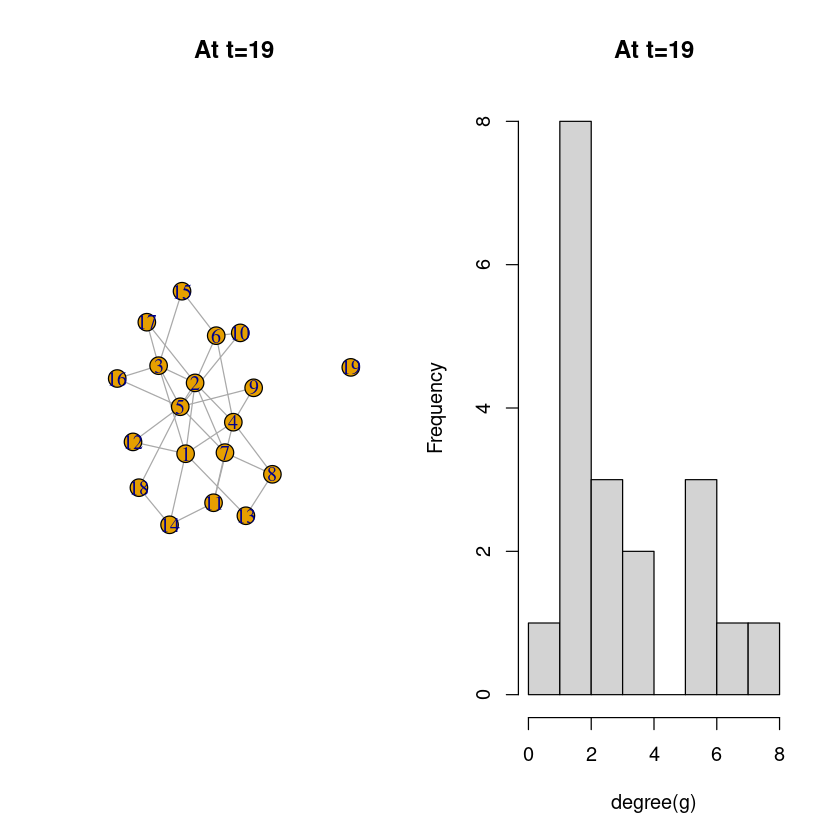

$res
 [1] 0.5526316 0.6000000 0.5384615 0.5526316 0.6000000 0.4772727 0.5675676
 [8] 0.4375000 0.4666667 0.4285714 0.4468085 0.4468085 0.3888889 0.4285714
[15] 0.4375000 0.4200000 0.4038462 0.4200000 0.4285714 0.4038462 0.3888889
[22] 0.4038462

$centralization
[1] 0.2890618

$theoretical_max
[1] 10.2439



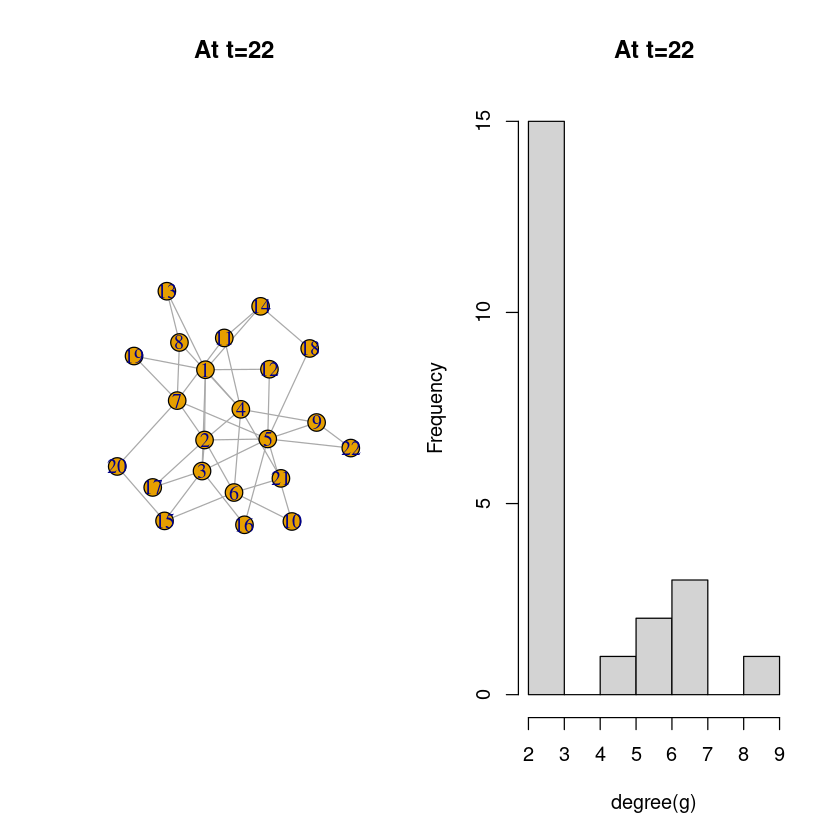

$res
 [1] 0.5434783 0.5681818 0.5208333 0.5434783 0.5681818 0.4464286 0.5319149
 [8] 0.4166667 0.4716981 0.4032258 0.4237288 0.4464286 0.3787879 0.4166667
[15] 0.4098361 0.4098361 0.3846154 0.4098361 0.4237288 0.3787879 0.3787879
[22] 0.3968254 0.3906250 0.3731343 0.3289474 0.3571429

$centralization
[1] 0.2818255

$theoretical_max
[1] 12.2449



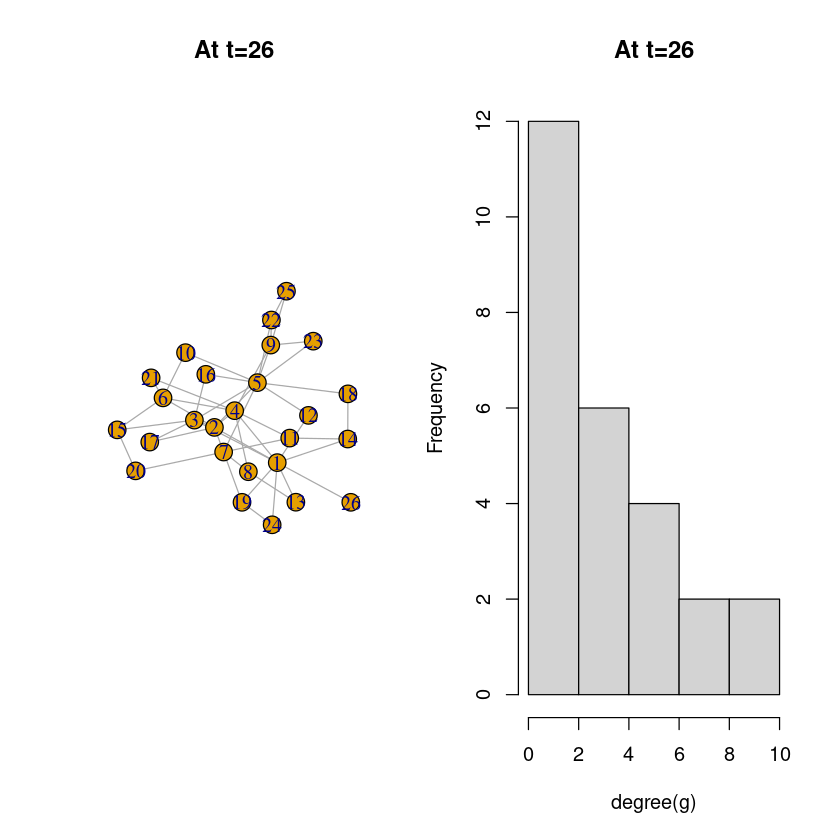

$res
 [1] 0.5178571 0.5576923 0.4915254 0.5370370 0.5800000 0.4393939 0.5471698
 [8] 0.4084507 0.4677419 0.4027778 0.4202899 0.4264706 0.3625000 0.4142857
[15] 0.3918919 0.4027778 0.3766234 0.4142857 0.4142857 0.3815789 0.3717949
[22] 0.3972603 0.3918919 0.3580247 0.3258427 0.4264706 0.4084507 0.3815789
[29] 0.3815789 0.2929293

$centralization
[1] 0.3305959

$theoretical_max
[1] 14.24561



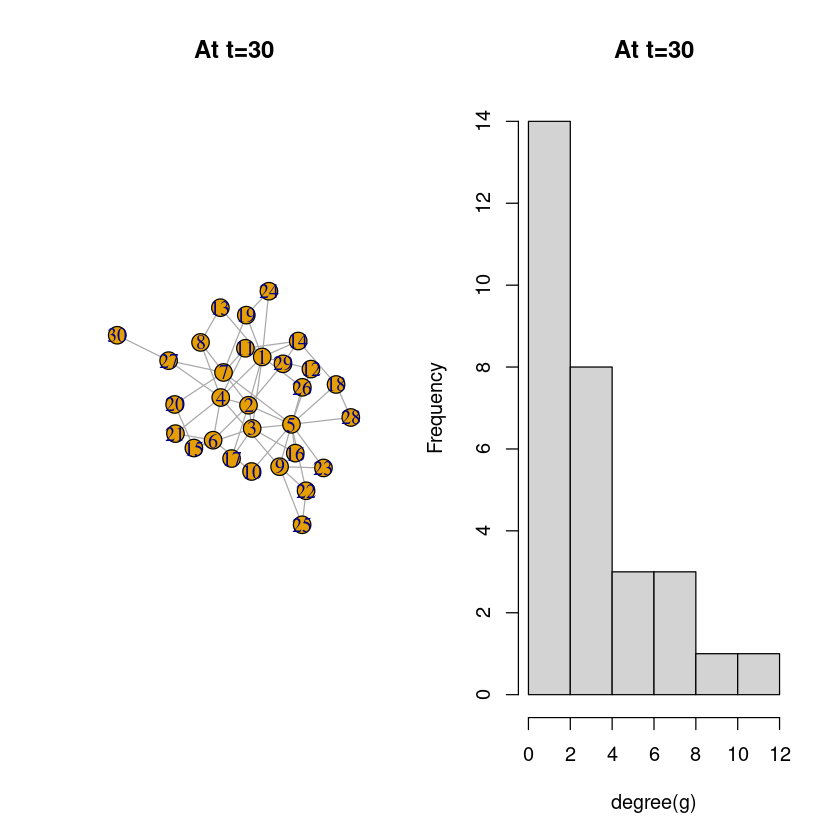

$res
 [1] 0.5238095 0.5500000 0.5076923 0.5076923 0.5892857 0.4285714 0.5409836
 [8] 0.4024390 0.4714286 0.4074074 0.4125000 0.4285714 0.3626374 0.4074074
[15] 0.3928571 0.4074074 0.3793103 0.4125000 0.4125000 0.3750000 0.3586957
[22] 0.4342105 0.3975904 0.3586957 0.3402062 0.4285714 0.4074074 0.3837209
[29] 0.3750000 0.3113208 0.3882353 0.3882353 0.3928571 0.4074074

$centralization
[1] 0.3535335

$theoretical_max
[1] 16.24615



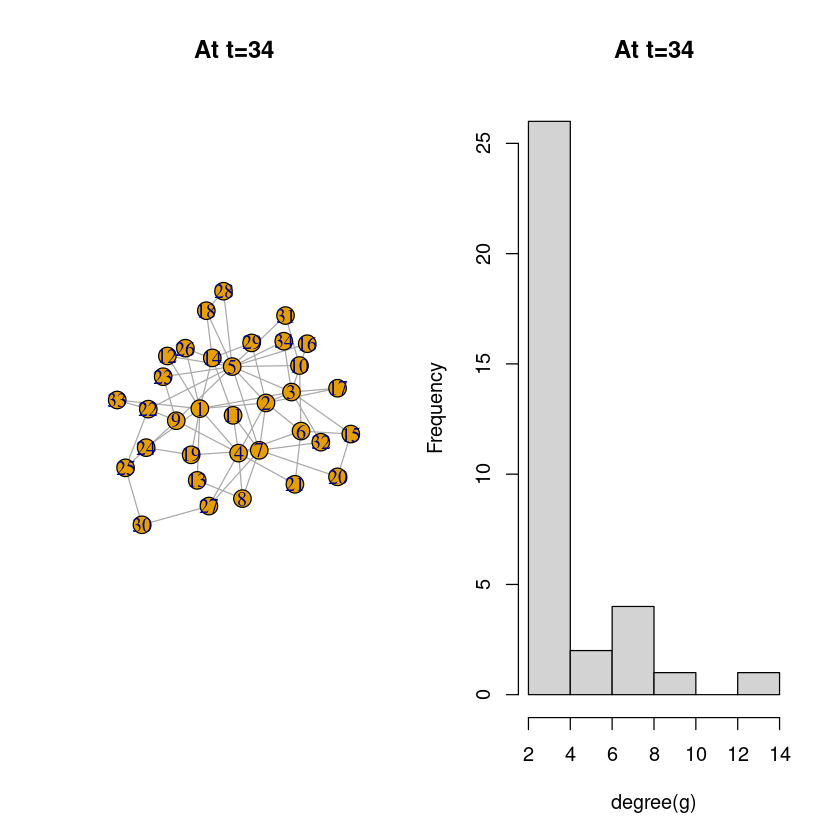

$res
 [1] 0.5138889 0.5441176 0.5068493 0.4933333 0.5781250 0.4204545 0.5285714
 [8] 0.3978495 0.4625000 0.4021739 0.4065934 0.4204545 0.3592233 0.4065934
[15] 0.3894737 0.4021739 0.3775510 0.4111111 0.4157303 0.3700000 0.3490566
[22] 0.4302326 0.3936170 0.3592233 0.3363636 0.4204545 0.4021739 0.3814433
[29] 0.3737374 0.3083333 0.3814433 0.3894737 0.3894737 0.4021739 0.3592233
[36] 0.3523810 0.3557692 0.3936170

$centralization
[1] 0.3498624

$theoretical_max
[1] 18.24658



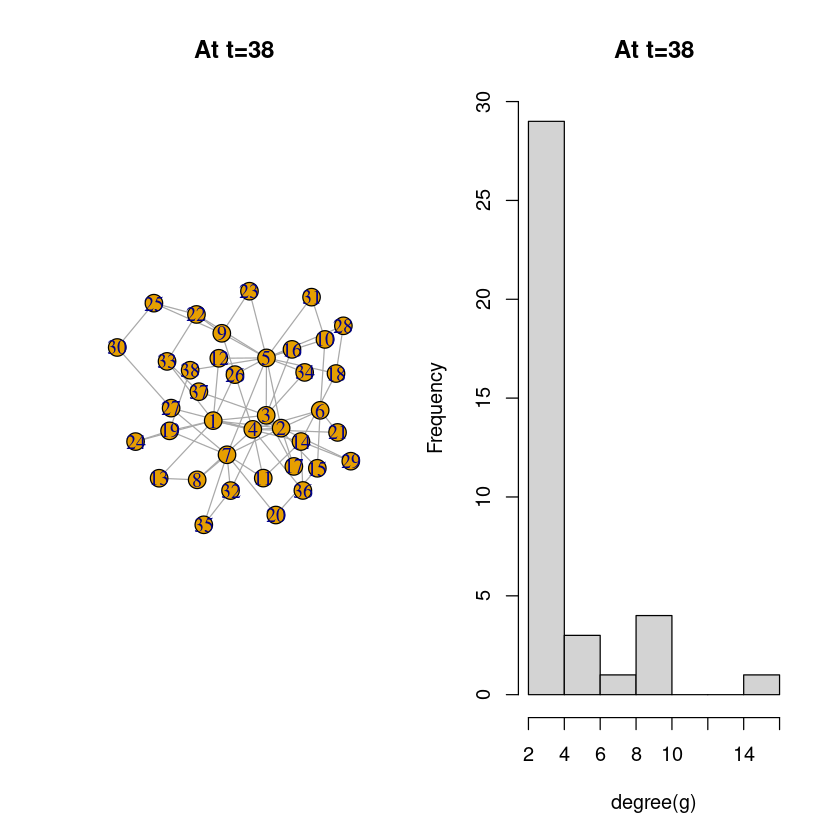

$res
 [1] 0.5061728 0.5324675 0.5061728 0.4823529 0.5694444 0.4141414 0.5125000
 [8] 0.3867925 0.4606742 0.3980583 0.4059406 0.4141414 0.3534483 0.4019608
[15] 0.3942308 0.3980583 0.3761468 0.4059406 0.4059406 0.3628319 0.3416667
[22] 0.4226804 0.3904762 0.3534483 0.3333333 0.4141414 0.3904762 0.3761468
[29] 0.3693694 0.3014706 0.3761468 0.3831776 0.3796296 0.4059406 0.3504274
[36] 0.3445378 0.3534483 0.3867925 0.4019608 0.3761468 0.3203125 0.2907801

$centralization
[1] 0.353967

$theoretical_max
[1] 20.24691



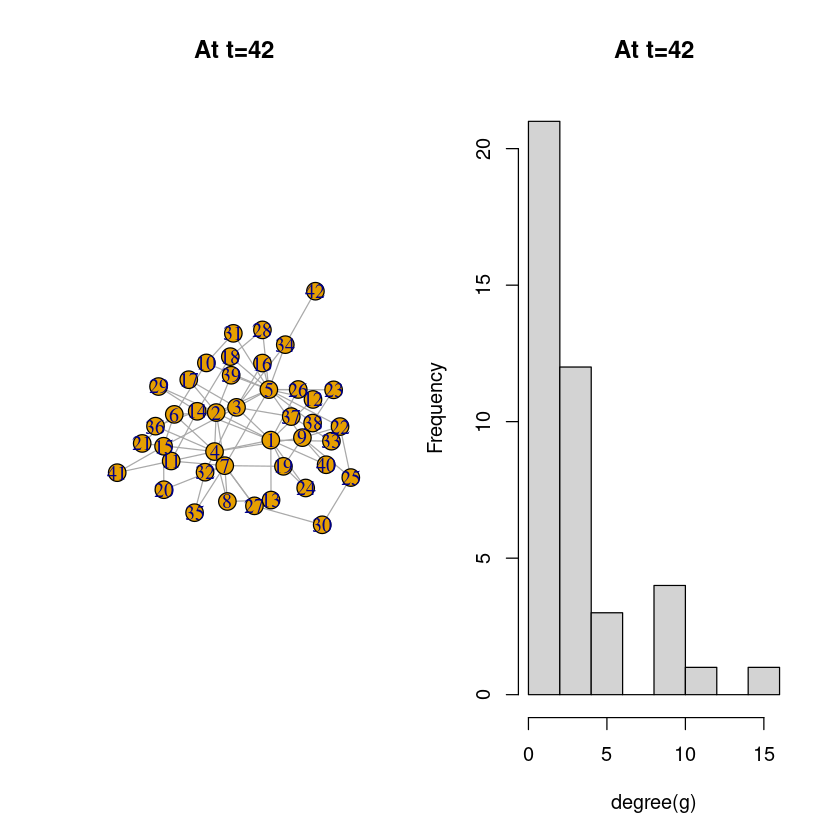

$res
 [1] 0.4895833 0.5222222 0.5000000 0.4747475 0.5662651 0.4122807 0.5053763
 [8] 0.3760000 0.4563107 0.3949580 0.4051724 0.4051724 0.3455882 0.3916667
[15] 0.3884298 0.3983051 0.3700787 0.3983051 0.3983051 0.3643411 0.3381295
[22] 0.4196429 0.3884298 0.3455882 0.3357143 0.4196429 0.3821138 0.3730159
[29] 0.3643411 0.3012821 0.3852459 0.3821138 0.3760000 0.4051724 0.3507463
[36] 0.3381295 0.3481481 0.3821138 0.4051724 0.3760000 0.3219178 0.3507463
[43] 0.3357143 0.3405797 0.3012821 0.4086957 0.3507463 0.3309859

$centralization
[1] 0.3639218

$theoretical_max
[1] 23.24731



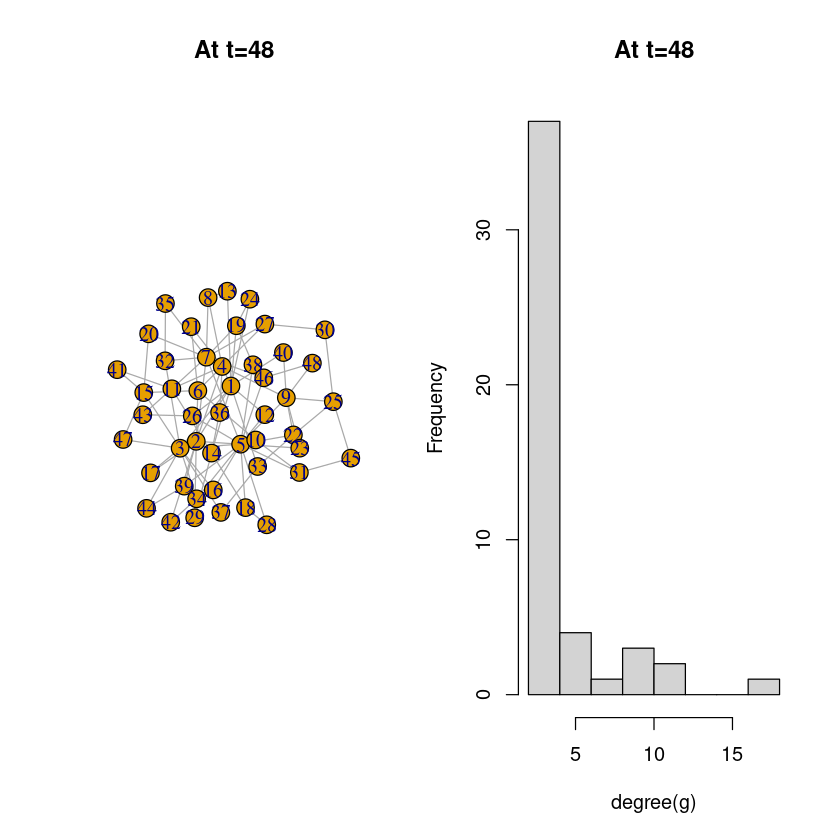

$res
 [1] 0.4854369 0.5263158 0.4950495 0.4761905 0.5494505 0.4132231 0.4950495
 [8] 0.3731343 0.4504505 0.3875969 0.4065041 0.3968254 0.3424658 0.3875969
[15] 0.3846154 0.3906250 0.3816794 0.3875969 0.3906250 0.3571429 0.3378378
[22] 0.4166667 0.3816794 0.3424658 0.3333333 0.4166667 0.3787879 0.3649635
[29] 0.3649635 0.2994012 0.3759398 0.3759398 0.3731343 0.3968254 0.3448276
[36] 0.3378378 0.3448276 0.3731343 0.4032258 0.3703704 0.3205128 0.3521127
[43] 0.3424658 0.3378378 0.2976190 0.3968254 0.3472222 0.3267974 0.3703704
[50] 0.2906977 0.3246753

$centralization
[1] 0.3436487

$theoretical_max
[1] 24.74747



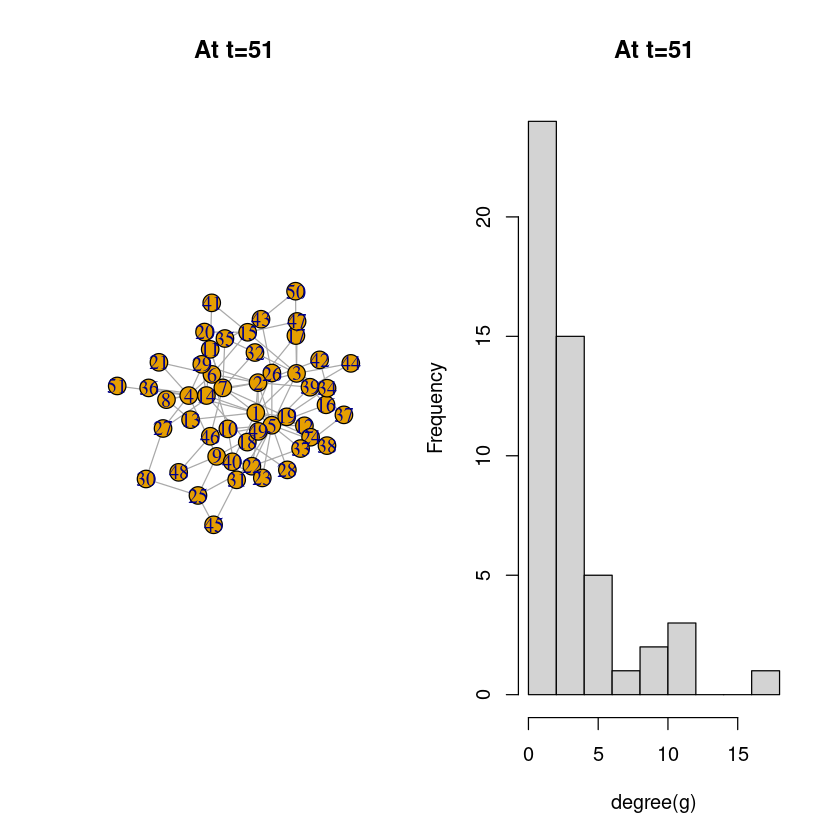

$res
 [1] 0.4782609 0.5140187 0.4782609 0.4700855 0.5339806 0.4135338 0.4824561
 [8] 0.3691275 0.4400000 0.3873239 0.4104478 0.3956835 0.3459119 0.3900709
[15] 0.3819444 0.3793103 0.3716216 0.3846154 0.3819444 0.3525641 0.3395062
[22] 0.4044118 0.3741497 0.3374233 0.3254438 0.4074074 0.3716216 0.3571429
[29] 0.3642384 0.2925532 0.3716216 0.3642384 0.3666667 0.3846154 0.3374233
[36] 0.3395062 0.3353659 0.3642384 0.3956835 0.3642384 0.3216374 0.3459119
[43] 0.3395062 0.3293413 0.2910053 0.3873239 0.3416149 0.3197674 0.3618421
[50] 0.2879581 0.3353659 0.3571429 0.3072626 0.3107345 0.3571429 0.2546296

$centralization
[1] 0.3338287

$theoretical_max
[1] 27.24771



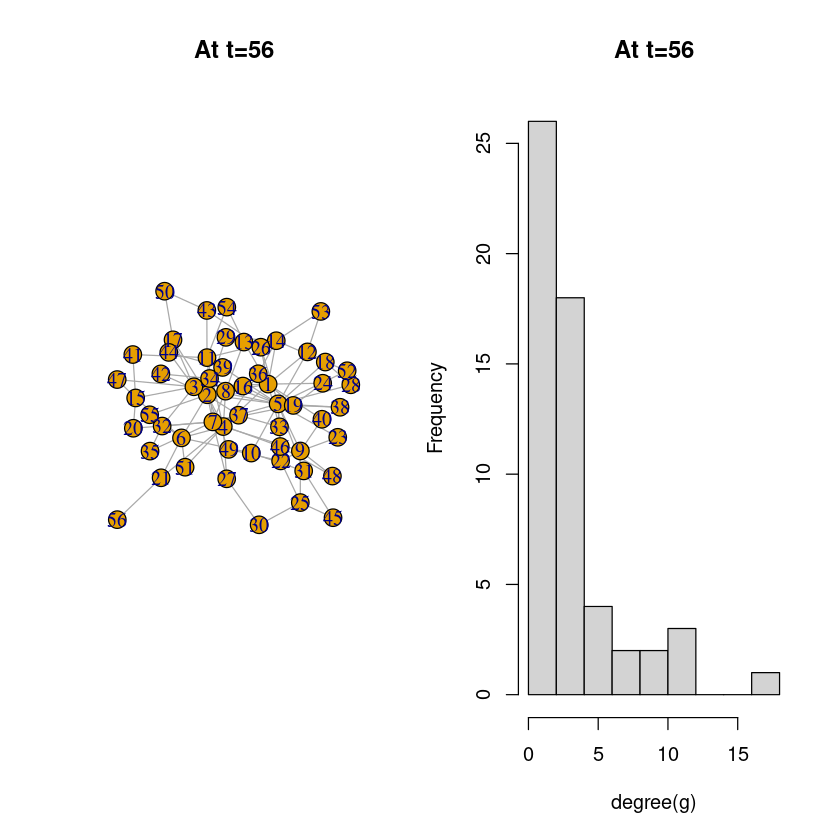

$res
 [1] 0.4750000 0.5044248 0.4750000 0.4634146 0.5327103 0.4130435 0.4830508
 [8] 0.3774834 0.4351145 0.3825503 0.4100719 0.3986014 0.3454545 0.3986014
[15] 0.3800000 0.3774834 0.3677419 0.3904110 0.3800000 0.3584906 0.3413174
[22] 0.3986014 0.3701299 0.3352941 0.3220339 0.4042553 0.3701299 0.3584906
[29] 0.3653846 0.2908163 0.3677419 0.3630573 0.3630573 0.3904110 0.3372781
[36] 0.3372781 0.3333333 0.3630573 0.3904110 0.3607595 0.3220339 0.3454545
[43] 0.3372781 0.3275862 0.2878788 0.3877551 0.3392857 0.3166667 0.3562500
[50] 0.2864322 0.3333333 0.3584906 0.3220339 0.3097826 0.3518519 0.2766990
[57] 0.3149171 0.3064516

$centralization
[1] 0.3365052

$theoretical_max
[1] 28.24779



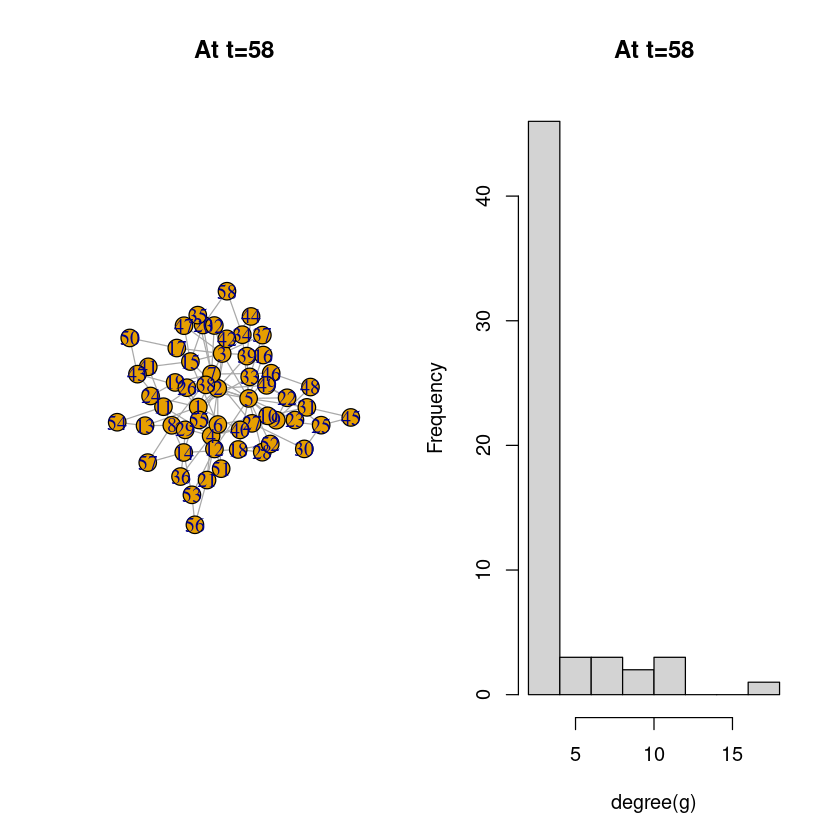

$res
 [1] 0.4687500 0.5000000 0.4724409 0.4580153 0.5263158 0.4081633 0.4724409
 [8] 0.3726708 0.4411765 0.3797468 0.4026846 0.3973510 0.3409091 0.3947368
[15] 0.3750000 0.3750000 0.3750000 0.3896104 0.3750000 0.3508772 0.3370787
[22] 0.3973510 0.3680982 0.3314917 0.3243243 0.4026846 0.3658537 0.3550296
[29] 0.3614458 0.2884615 0.3636364 0.3592814 0.3614458 0.3870968 0.3314917
[36] 0.3351955 0.3314917 0.3614458 0.3870968 0.3614458 0.3157895 0.3428571
[43] 0.3351955 0.3260870 0.2857143 0.3821656 0.3370787 0.3191489 0.3529412
[50] 0.2898551 0.3296703 0.3592814 0.3191489 0.3061224 0.3529412 0.2739726
[57] 0.3125000 0.3030303 0.3333333 0.3278689 0.2654867

$centralization
[1] 0.3344014

$theoretical_max
[1] 29.7479



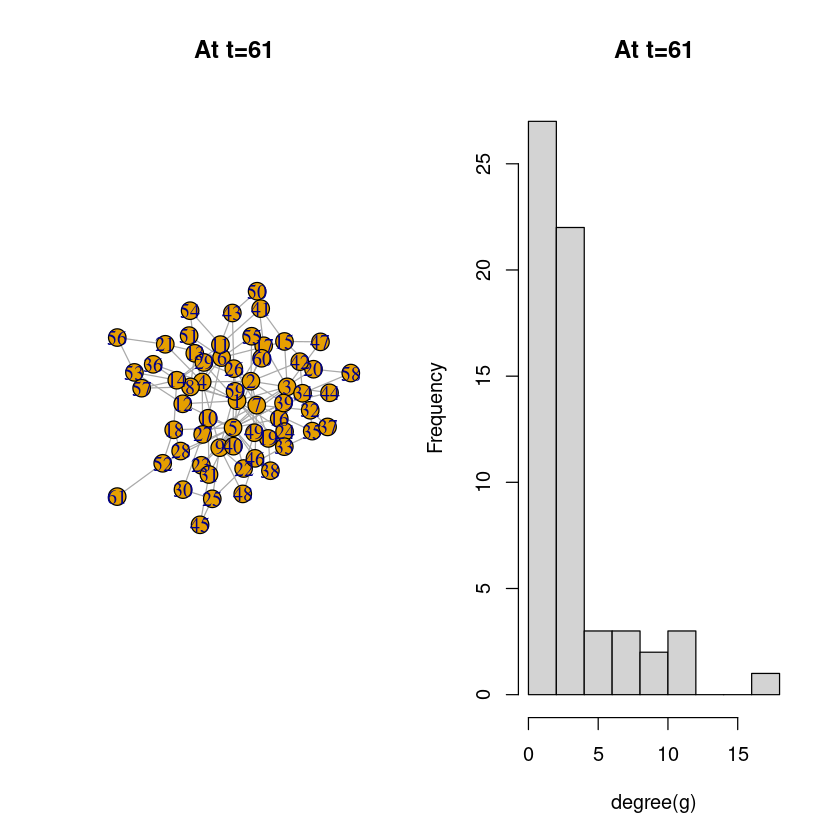

$res
 [1] 0.4642857 0.4961832 0.4710145 0.4577465 0.5327869 0.4062500 0.4676259
 [8] 0.3651685 0.4391892 0.3779070 0.3987730 0.3963415 0.3367876 0.3963415
[15] 0.3714286 0.3779070 0.3714286 0.3987730 0.3693182 0.3494624 0.3571429
[22] 0.3987730 0.3672316 0.3282828 0.3233831 0.4012346 0.3591160 0.3611111
[29] 0.3631285 0.2850877 0.3631285 0.3571429 0.3611111 0.3892216 0.3299492
[36] 0.3350515 0.3316327 0.3631285 0.3846154 0.3591160 0.3140097 0.3403141
[43] 0.3333333 0.3250000 0.2850877 0.3846154 0.3350515 0.3170732 0.3532609
[50] 0.2888889 0.3282828 0.3693182 0.3233831 0.3037383 0.3494624 0.2813853
[57] 0.3110048 0.3051643 0.3316327 0.3250000 0.2813853 0.3110048 0.3651685
[64] 0.3266332 0.3155340 0.3801170

$centralization
[1] 0.3508979

$theoretical_max
[1] 32.24806



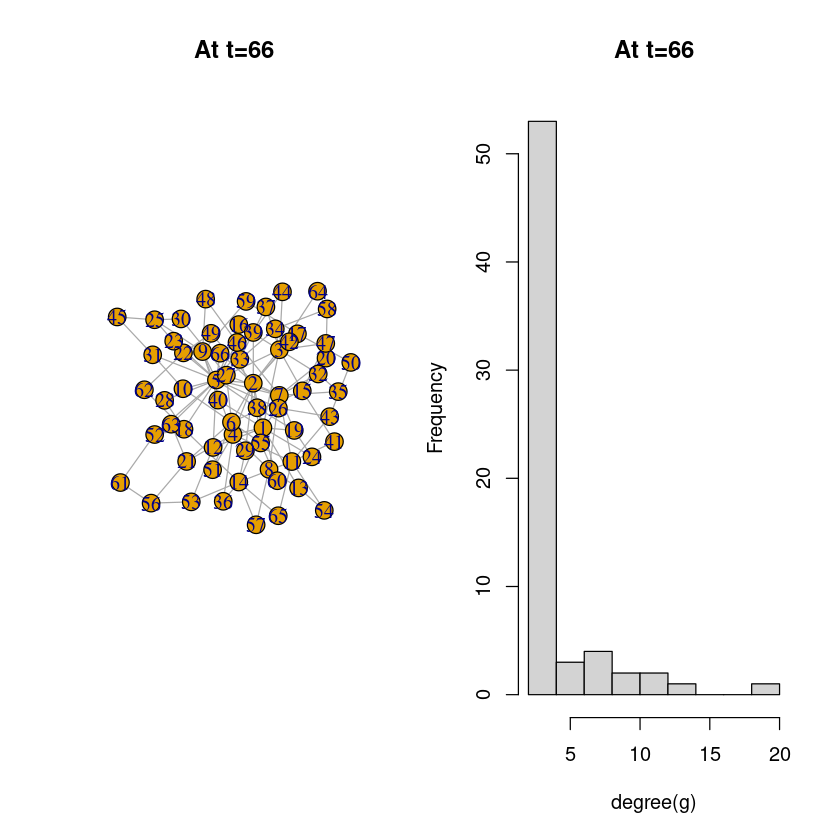

$res
 [1] 0.4645161 0.4897959 0.4615385 0.4615385 0.5179856 0.4022346 0.4500000
 [8] 0.3618090 0.4337349 0.3730570 0.3956044 0.3934426 0.3364486 0.3956044
[15] 0.3654822 0.3692308 0.3654822 0.3934426 0.3673469 0.3380282 0.3564356
[22] 0.3934426 0.3636364 0.3272727 0.3185841 0.3956044 0.3564356 0.3564356
[29] 0.3582090 0.2812500 0.3546798 0.3478261 0.3582090 0.3789474 0.3214286
[36] 0.3412322 0.3257919 0.3600000 0.3789474 0.3564356 0.3116883 0.3364486
[43] 0.3302752 0.3200000 0.2812500 0.3730570 0.3287671 0.3130435 0.3512195
[50] 0.2845850 0.3287671 0.3654822 0.3200000 0.3037975 0.3495146 0.2823529
[57] 0.3103448 0.2962963 0.3272727 0.3317972 0.2834646 0.3090129 0.3636364
[64] 0.3214286 0.3157895 0.3750000 0.2891566 0.3461538 0.3769634 0.3228700
[71] 0.3243243 0.2637363 0.3171806

$centralization
[1] 0.3354331

$theoretical_max
[1] 35.74825



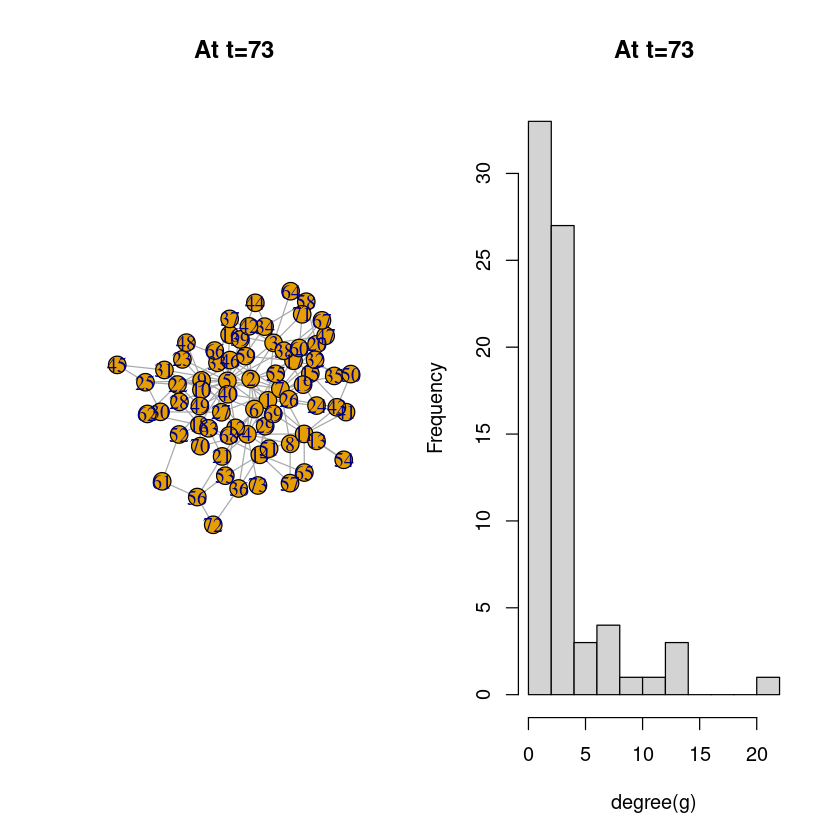

$res
 [1] 0.4720497 0.4871795 0.4634146 0.4606061 0.5314685 0.3979058 0.4523810
 [8] 0.3601896 0.4318182 0.3725490 0.3979058 0.4064171 0.3392857 0.3958333
[15] 0.3636364 0.3762376 0.3619048 0.3958333 0.3707317 0.3362832 0.3568075
[22] 0.3958333 0.3653846 0.3304348 0.3166667 0.4000000 0.3551402 0.3601896
[29] 0.3568075 0.2794118 0.3601896 0.3486239 0.3601896 0.3857868 0.3220339
[36] 0.3408072 0.3261803 0.3781095 0.3819095 0.3584906 0.3114754 0.3348018
[43] 0.3318777 0.3206751 0.2814815 0.3781095 0.3275862 0.3114754 0.3486239
[50] 0.2835821 0.3275862 0.3707317 0.3247863 0.3052209 0.3470320 0.3166667
[57] 0.3089431 0.2992126 0.3247863 0.3348018 0.3015873 0.3076923 0.3636364
[64] 0.3220339 0.3153527 0.3781095 0.2934363 0.3470320 0.3800000 0.3220339
[71] 0.3247863 0.2724014 0.3392857 0.3290043 0.3636364 0.3619048 0.3333333
[78]       NaN

$centralization
[1] NaN

$theoretical_max
[1] 38.24837



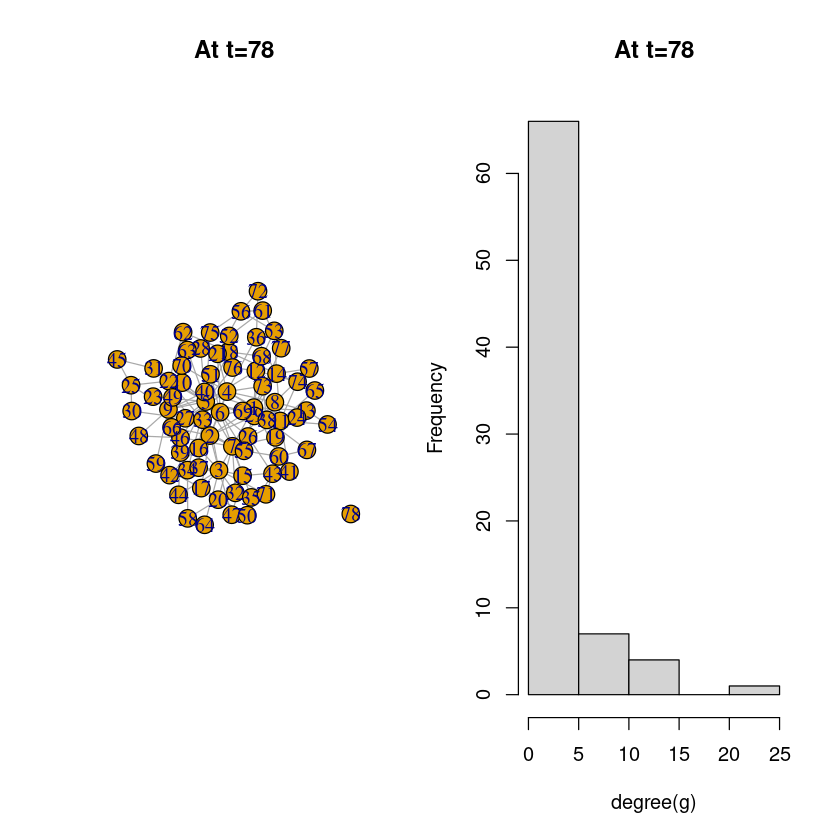

$res
 [1] 0.4606742 0.4767442 0.4581006 0.4456522 0.5222930 0.3904762 0.4408602
 [8] 0.3504274 0.4270833 0.3693694 0.3831776 0.4039409 0.3319838 0.3867925
[15] 0.3565217 0.3796296 0.3628319 0.3904762 0.3612335 0.3280000 0.3504274
[22] 0.3942308 0.3644444 0.3241107 0.3190661 0.3942308 0.3474576 0.3549784
[29] 0.3489362 0.2789116 0.3612335 0.3430962 0.3549784 0.3813953 0.3153846
[36] 0.3333333 0.3228346 0.3744292 0.3778802 0.3534483 0.3025830 0.3293173
[43] 0.3266932 0.3178295 0.2837370 0.3710407 0.3241107 0.3082707 0.3430962
[50] 0.2827586 0.3203125 0.3644444 0.3228346 0.2960289 0.3430962 0.3141762
[57] 0.3014706 0.2949640 0.3215686 0.3306452 0.2992701 0.3082707 0.3580786
[64] 0.3190661 0.3071161 0.3744292 0.2918149 0.3416667 0.3727273 0.3153846
[71] 0.3241107 0.2697368 0.3319838 0.3241107 0.3596491 0.3612335 0.3280000
[78] 0.3580786 0.2770270 0.2971014 0.2847222 0.2779661 0.2492401

$centralization
[1] 0.3582829

$theoretical_max
[1] 40.74847



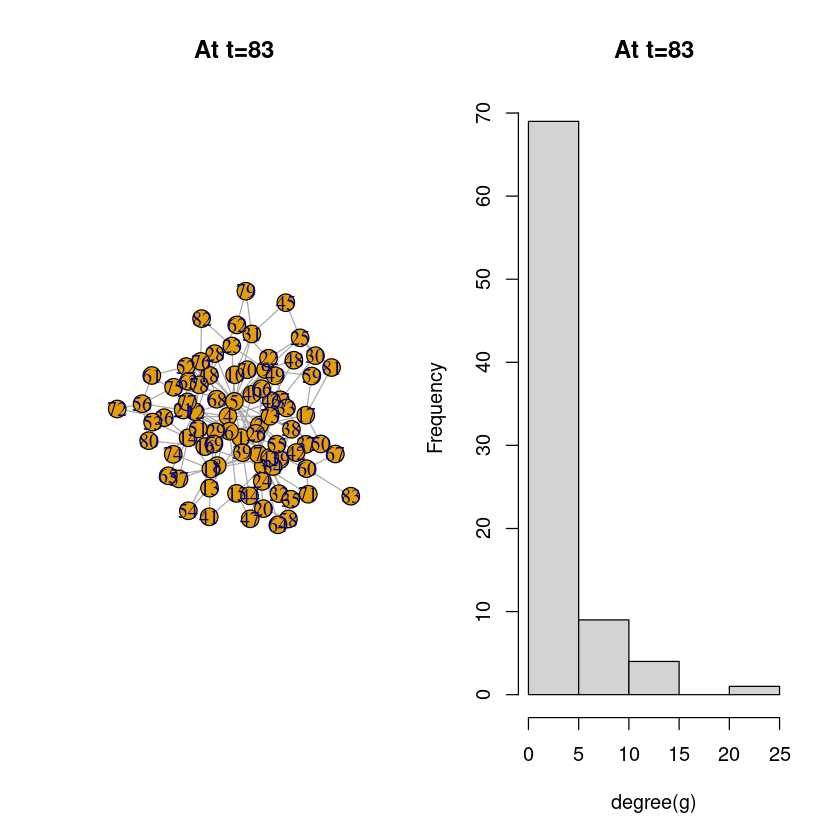

$res
 [1] 0.4550265 0.4804469 0.4550265 0.4455959 0.5180723 0.3891403 0.4410256
 [8] 0.3495935 0.4257426 0.3659574 0.3873874 0.4000000 0.3295019 0.3822222
[15] 0.3553719 0.3755459 0.3722944 0.3873874 0.3568465 0.3269962 0.3524590
[22] 0.3926941 0.3628692 0.3208955 0.3197026 0.3891403 0.3467742 0.3524590
[29] 0.3495935 0.2783172 0.3583333 0.3412698 0.3510204 0.3771930 0.3150183
[36] 0.3333333 0.3208955 0.3690987 0.3788546 0.3481781 0.3049645 0.3307692
[43] 0.3295019 0.3161765 0.2838284 0.3690987 0.3220974 0.3071429 0.3553719
[50] 0.2885906 0.3197026 0.3659574 0.3220974 0.2965517 0.3426295 0.3208955
[57] 0.2986111 0.2925170 0.3245283 0.3269962 0.3115942 0.3071429 0.3568465
[64] 0.3173432 0.3071429 0.3755459 0.2876254 0.3372549 0.3771930 0.3161765
[71] 0.3220974 0.2721519 0.3320463 0.3257576 0.3583333 0.3628692 0.3295019
[78] 0.3539095 0.2756410 0.2965517 0.2895623 0.2792208 0.3173432 0.2819672
[85] 0.3359375 0.2915254 0.3028169

$centralization
[1] 0.3526643

$theoretical_max
[1] 42.7485

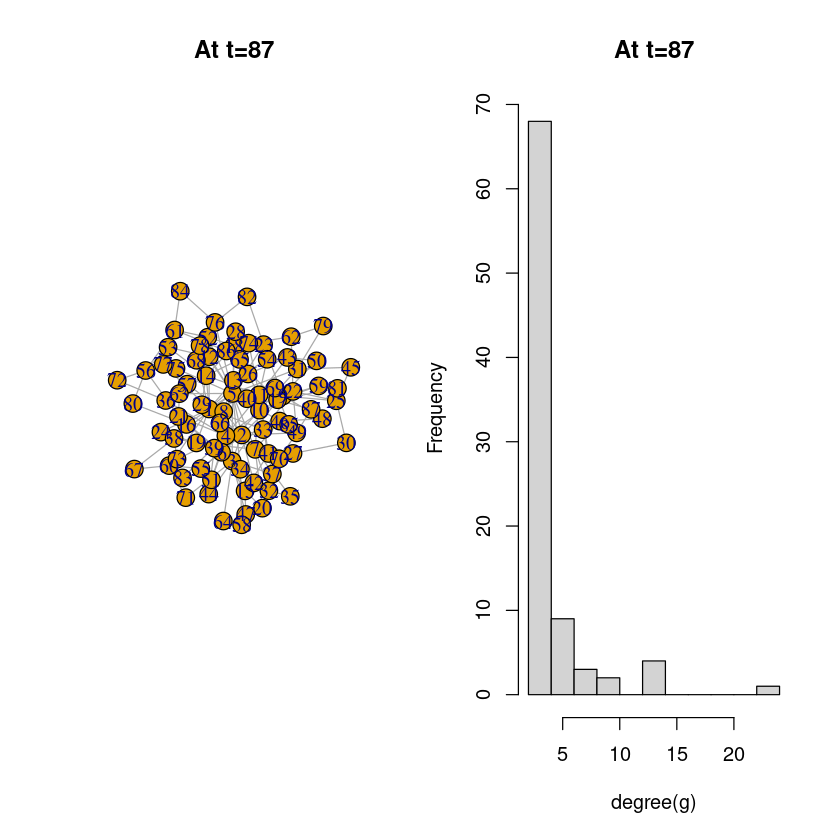

$res
 [1] 0.4568528 0.4787234 0.4522613 0.4477612 0.5142857 0.3862661 0.4390244
 [8] 0.3529412 0.4265403 0.3629032 0.3846154 0.3982301 0.3333333 0.3813559
[15] 0.3529412 0.3750000 0.3719008 0.3829787 0.3571429 0.3249097 0.3515625
[22] 0.3930131 0.3614458 0.3214286 0.3202847 0.3879310 0.3461538 0.3501946
[29] 0.3474903 0.2786378 0.3557312 0.3422053 0.3515625 0.3734440 0.3135889
[36] 0.3345725 0.3191489 0.3658537 0.3750000 0.3501946 0.3020134 0.3296703
[43] 0.3284672 0.3146853 0.2830189 0.3673469 0.3202847 0.3071672 0.3543307
[50] 0.2875399 0.3202847 0.3629032 0.3214286 0.2970297 0.3409091 0.3202847
[57] 0.3000000 0.2903226 0.3237410 0.3272727 0.3125000 0.3061224 0.3543307
[64] 0.3157895 0.3061224 0.3719008 0.2866242 0.3370787 0.3734440 0.3169014
[71] 0.3202847 0.2786378 0.3321033 0.3237410 0.3571429 0.3600000 0.3296703
[78] 0.3515625 0.2743902 0.2970297 0.2893891 0.2777778 0.3180212 0.2803738
[85] 0.3345725 0.2912621 0.3010033 0.2719033 0.3345725 0.3488372 0.3237410
[92]       NaN

$cen

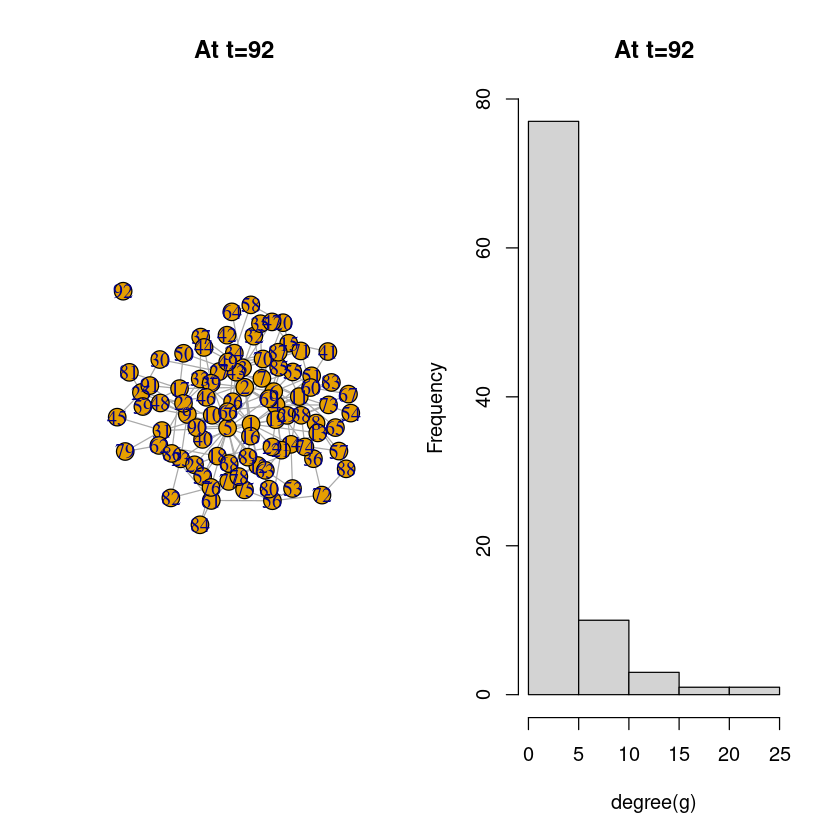

$res
 [1] 0.4519231 0.4795918 0.4497608 0.4476190 0.5164835 0.3900415 0.4392523
 [8] 0.3574144 0.4234234 0.3643411 0.3836735 0.3966245 0.3321555 0.3805668
[15] 0.3520599 0.3745020 0.3700787 0.3884298 0.3547170 0.3252595 0.3520599
[22] 0.3916667 0.3615385 0.3186441 0.3175676 0.3868313 0.3455882 0.3520599
[29] 0.3481481 0.2772861 0.3560606 0.3405797 0.3481481 0.3730159 0.3133333
[36] 0.3333333 0.3175676 0.3657588 0.3775100 0.3468635 0.3003195 0.3298246
[43] 0.3263889 0.3143813 0.2822823 0.3671875 0.3197279 0.3051948 0.3533835
[50] 0.2857143 0.3208191 0.3643411 0.3197279 0.2965300 0.3418182 0.3186441
[57] 0.2993631 0.2892308 0.3219178 0.3252595 0.3122924 0.3081967 0.3547170
[64] 0.3143813 0.3051948 0.3730159 0.2857143 0.3369176 0.3775100 0.3164983
[71] 0.3186441 0.2781065 0.3321555 0.3219178 0.3574144 0.3601533 0.3275261
[78] 0.3520599 0.2748538 0.2955975 0.2874618 0.2772861 0.3175676 0.2814371
[85] 0.3357143 0.2910217 0.3003195 0.2740525 0.3321555 0.3455882 0.3219178
[92] 0.3051948 0.308

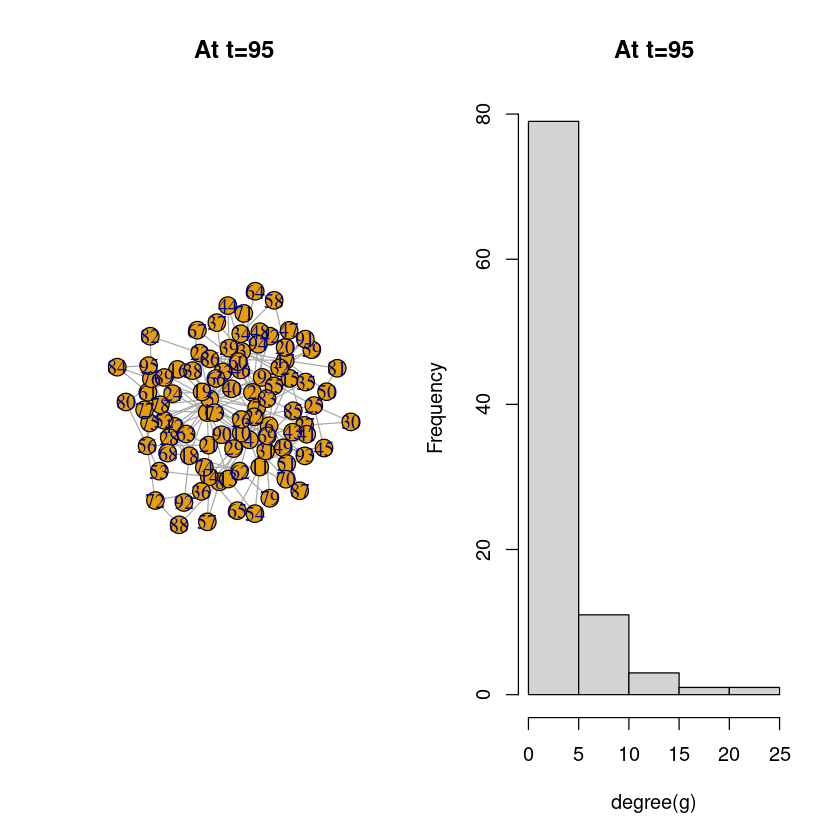

$res
  [1] 0.4385965 0.4651163 0.4385965 0.4444444 0.5050505 0.3861004 0.4347826
  [8] 0.3584229 0.4201681 0.3610108 0.3816794 0.3891051 0.3278689 0.3745318
 [15] 0.3508772 0.3676471 0.3610108 0.3831418 0.3496503 0.3289474 0.3496503
 [22] 0.3831418 0.3558719 0.3125000 0.3144654 0.3787879 0.3436426 0.3496503
 [29] 0.3412969 0.2762431 0.3508772 0.3401361 0.3401361 0.3676471 0.3115265
 [36] 0.3333333 0.3115265 0.3610108 0.3690037 0.3401361 0.2994012 0.3236246
 [43] 0.3215434 0.3086420 0.2785515 0.3610108 0.3215434 0.3030303 0.3460208
 [50] 0.2808989 0.3194888 0.3584229 0.3154574 0.2941176 0.3344482 0.3154574
 [57] 0.2976190 0.2941176 0.3174603 0.3174603 0.3067485 0.3039514 0.3496503
 [64] 0.3125000 0.3030303 0.3649635 0.2816901 0.3300330 0.3717472 0.3144654
 [71] 0.3125000 0.2777778 0.3355705 0.3174603 0.3533569 0.3533569 0.3205128
 [78] 0.3460208 0.2710027 0.2915452 0.2816901 0.2732240 0.3154574 0.2777778
 [85] 0.3289474 0.2857143 0.2976190 0.2754821 0.3246753 0.3378378 0.3174603
 [92] 0

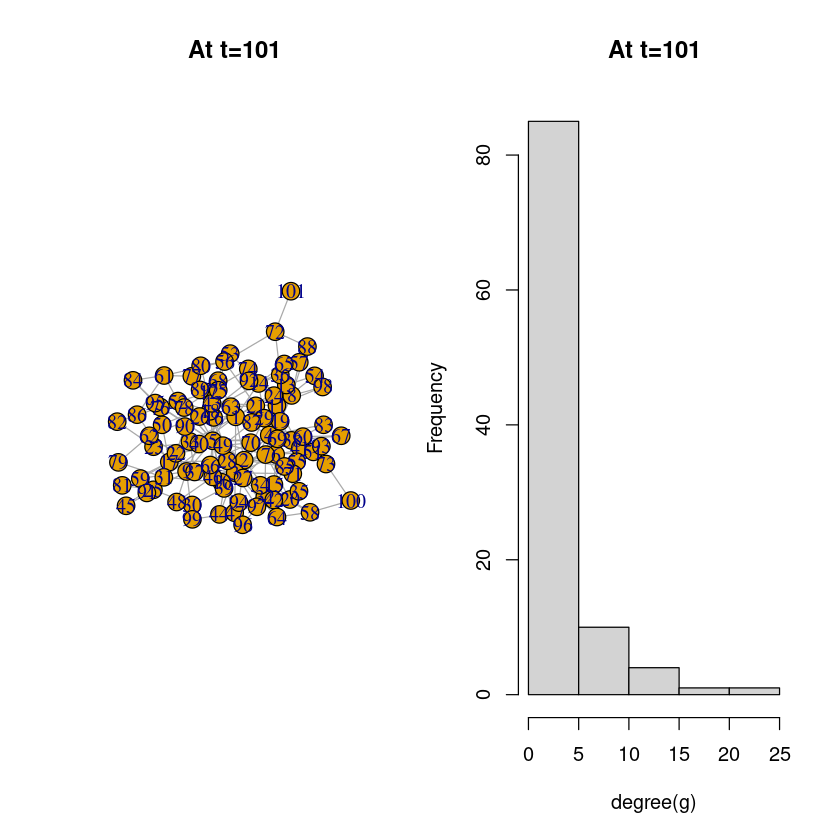

In [10]:
tPeriods=10;
attemptsToAddNodes = 10;
while (vcount(g) < tPeriods*attemptsToAddNodes) {
    for (t in 1:attemptsToAddNodes) {
        g = addNodes(g, m);
    }
    par(mfrow = c(1, 2));
    nodeCount = vcount(g)
    plot(g, main=sprintf("At t=%d", nodeCount));
    hist(degree(g), main=sprintf("At t=%d", nodeCount));
    print(centr_clo(g))
}

### Origins of preferential attachment

#### Link selection

If a new node chooses a random edge, and then selects one that is connected to that edge, then you will expect the more-popular nodes (with higher degree distributions) to be picked more often than nodes that don't already have 

#### Copying model

A new node joins a network, and looks at another node. The new node copies the links of the existing node.

#### The good get richer (rather than the rich get richer)

For every pair of nodes, we decide on the fitness, and then decide to have an edge between them or not.

If your fitness values come from a scale-free distribution then you end up with a scale-free network. Even without a scale-free distribution, you can get a scale-free network.

For example, if you use the Poisson Distribution to generate your threshold value then you get a scale-free distribution.